In [3]:
using Plots
using DelimitedFiles
# using Base.Threads

include("stabilityFunctions.jl");
# print number of threads
println("Number of threads: ", Threads.nthreads())

Number of threads: 32


In [2]:
# import matlab solutions 
solutions = readdlm("test & misc/matlab_solutions.csv", ',', Float64);

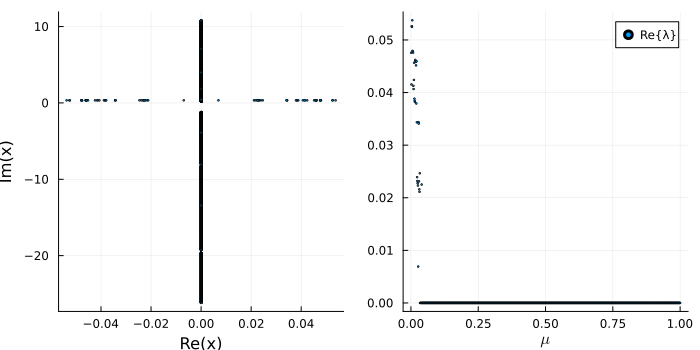

In [5]:
# compute eigenvalues λ
λ21000 = solveGenEig(solutions[40,:], 2, 1000)
stabilityPlots(λ21000, 1000)

In [11]:
solveGenEig(solutions[40,:], 8, 1000)

34×1000 Matrix{ComplexF64}:
   -0.0475863+0.33257im    -0.0415593+0.334896im  …   -3.13185e-8+62.943im
  -1.87802e-8+81.8824im   -9.78304e-8+81.8909im       -1.15052e-8+79.4109im
  -4.93518e-9-93.0343im   -6.03971e-8-128.823im       -1.10861e-8-103.055im
  -2.70347e-9+55.6848im   -3.25878e-8-114.1im          -6.0421e-9-93.023im
  -2.20855e-9-103.113im   -2.62516e-8-103.123im       -3.88565e-9-83.3149im
  -1.27911e-9-128.812im  -7.47818e-11-73.9597im   …   -1.42214e-9+48.7267im
  -1.27812e-9+48.7347im  -3.45376e-11+19.4573im       -1.12097e-9+42.1286im
 -3.48047e-10+35.8886im  -1.33464e-11-40.1355im      -4.14306e-10+1.82481im
 -1.54034e-10-56.2665im  -3.77986e-12-32.7063im      -4.08431e-10+10.6684im
 -1.25262e-10+30.0116im   -2.9464e-12+4.06521im      -3.03687e-10-64.9167im
             ⋮                                    ⋱  
  3.05872e-11+24.5247im   1.21329e-10+48.7415im   …   2.29536e-10-3.88824im
  6.16755e-11-64.9255im   1.46562e-10-64.9344im       2.71856e-10+7.07716im
  6.2103

In [4]:
for i in 1:100
    # solve for given solution
    sol = solveGenEig(solutions[i,:], 12, 84500)

    # save solution 
    writedlm("stabilitySolutions2/$(i).12.84500.stabSol.csv", sol, ',')
end

In [8]:
# load solution
sol = readdlm("stabilitySolutions2/1.12.84500.stabSol.csv", ',', Complex{Float64})

50×84500 Matrix{ComplexF64}:
   -1.0383e-6+113.132im    -6.01999e-7-171.286im  …  -3.78941e-5-221.276im
   -8.6707e-7-171.286im    -3.51854e-7+113.132im     -2.32389e-5+151.808im
   -4.3236e-8+104.101im    -2.59405e-7-159.424im     -6.36198e-7+131.965im
  -2.20737e-8-147.829im    -2.17052e-7+104.101im     -3.27408e-7+122.416im
  -1.93445e-8+78.651im     -6.51032e-8-136.51im      -6.18415e-8+4.0122im
  -1.04007e-8-125.475im    -5.40795e-8+86.8527im  …  -4.40171e-8+95.3299im
    -9.718e-9-114.731im    -5.86711e-9+78.6511im     -4.29235e-8+104.092im
  -8.48549e-9-221.29im     -4.84631e-9-114.731im     -1.63807e-8+78.643im
  -5.21542e-9+70.7427im    -2.59304e-9+70.7428im     -1.33586e-8-125.464im
 -8.89828e-10+0.332658im  -8.01774e-10+63.1373im      -6.6124e-9-13.6541im
             ⋮                                    ⋱  
   1.18115e-9+0.223166im    5.85849e-9-125.475im       4.4429e-8-147.818im
   2.21081e-8+95.3385im     8.73493e-7-183.41im       6.72088e-8+162.091im
   4.28132e-8-159.4

In [14]:
stabilityPlotsGPU(sol, 84500)

In [18]:
findall[real(sol) .> ones(shape(sol)).*1e-7]

UndefVarError: UndefVarError: `shape` not defined

In [21]:
sol[real(sol) .> 1e-7]

476933-element Vector{ComplexF64}:
  8.705825615694276e-7 - 183.40958086441213im
 1.0374582341740453e-6 + 122.42547370862285im
 3.5062346221043036e-6 + 131.97475817362547im
  4.133016399372893e-6 - 195.78858694349293im
  7.004946017884362e-6 - 208.41697229238784im
  8.267163116982973e-6 + 141.77401442551727im
  8.734929817699939e-7 - 183.4097257197299im
 1.0381439354945276e-6 + 122.42558510551892im
 3.5041372912913297e-6 + 131.97487256003362im
   4.13720888806433e-6 - 195.78873477849402im
                       ⋮
  1.650314861353149e-5 - 208.4040704056234im
  1.650675584300423e-5 + 151.80746953310165im
 1.0374508395086468e-7 - 234.38820429947785im
 3.2860409531635717e-7 - 183.39732857858627im
  4.347537418839997e-7 - 171.27377030768753im
  5.194938282693574e-7 + 113.12287635405475im
  6.458290799898782e-7 - 195.77608243523358im
  5.785459277042259e-6 + 141.76409213169603im
  9.534637633856457e-6 - 208.40422115723945im

In [23]:
[real(sol) .> 1e-7]

1-element Vector{BitMatrix}:
 [0 0 … 0 0; 0 0 … 0 0; … ; 1 1 … 1 1; 1 1 … 1 1]